1. Импорт библиотек

In [1]:
from pandas import Series
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

2. Читаем данные

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print('Размерность тренировочного датасета: ', train.shape, '\n')

Размерность тренировочного датасета:  (73799, 19) 



In [4]:
print('Информация о датасете')
print('=====================\n')
display(train.info())

Информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time       

None

In [5]:
print('Размерность тестового датасета: ', test.shape,'\n')

Размерность тестового датасета:  (36349, 18) 



In [6]:
print('Информация о датасете')
print('=====================\n')
display(test.info())

Информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time       

None

В датасете test нет перемнной "default". Мы должны предсказать значение указанной переменной, 
предварительно заполним ее нулями. 
Для корректной обработки признаков объединим датасеты train и test, 
предварительно в новой переменной "train" указав, какие записи относятся к датасету train.

In [7]:
test['default'] = 0 # заполняем переменную нудями
test['train'] = 0 # указываем, что записи не принадлежат датасету train
train['train'] = 1 # указываем, что записи принадлежат датасету train
data = train.append(test, sort = False).reset_index(drop=True) # объединяем датасеты в один

3. Предварительный анализ данных

In [8]:
# смотрим на данные в датасете
display(data)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,train
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0,1
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0,1
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0,1
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0,1
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,83775,31MAR2014,SCH,F,37,N,N,1,0,-1.744976,3,50,2,3,15000,4,1,N,0,0
110144,106254,25APR2014,GRD,F,64,Y,Y,0,0,-2.293781,3,60,1,2,200000,1,4,N,0,0
110145,81852,30MAR2014,GRD,M,31,N,N,2,0,-0.940752,1,50,1,2,60000,4,2,N,0,0
110146,1971,07JAN2014,UGR,F,27,N,N,1,0,-1.242392,2,80,2,3,30000,1,1,N,0,0


Видим, что для записей датасета нет переменных, в значении которых хранятся несколько значений.

In [9]:
# смотрим на информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

Видим наличие пропусков в переменной "education". Поработаем с ней.

In [10]:
print("Количество пропусков в переменной 'education': "
      ,len(data[data['education'].isnull()])) # определяем количество пропусков

print("Доля записей с пропусками: "
      ,round(len(data[data['education'].isnull()])/len(data)*100, 2), "%") # определяем долю записей с пропусками

Количество пропусков в переменной 'education':  478
Доля записей с пропусками:  0.43 %


Видим, что доля записей с пропусками составляет 0.43 %. 
Пропущенные значения заполним наиболее часто встречающимся значением 
в переменной 'education' - такой подход не сильно изменит картину в целом, т.к. доля 0.43 % слишком мала.

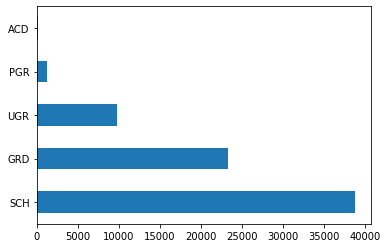

In [11]:
# определяем наиболее часто встречающимся значением в переменной 'education'
train['education'].value_counts().plot.barh() 

In [12]:
# заполням пропущенные значения в переменной 'education' значением "SCH"
data[data['education'].isnull()] = data[data['education'].isnull()].fillna('SCH')

Пока с переменной 'education' закончили.

In [13]:
# посмотрим количество уникальных значений в каждой переменной датасета
data.nunique()

client_id           110148
app_date               120
education                5
sex                      2
age                     52
car                      2
car_type                 2
decline_app_cnt         24
good_work                2
score_bki           102618
bki_request_cnt         40
region_rating            7
home_address             3
work_address             3
income                1207
sna                      4
first_time               4
foreign_passport         2
default                  2
train                    2
dtype: int64

Выделим из датасета бинарные (за исключением 'default' и 'train'), категориальные 
и числовые признаки (за исключением 'client_id').

In [14]:
# бинарные переменные
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

# категориальные переменные
cat_cols = ['education', 'home_address', 'work_address', 'sna', 'first_time']

# числовые переменные
num_cols = ['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'region_rating', 'income']

На этом предварительный анализ датасета закончим и перейдем к анализу непосредственно самих данных,
их преобразованию и созданию новых признаков.

4. Анализ и преобразование данных

4.1 Целевая переменная 'default'

Посмотрим на распределение целевой переменной 'default' (для записей из датасета 'train', 
т.к. для записей из датасета 'test' мы задали значение ноль, что не корректно.)

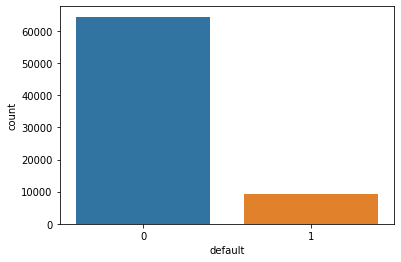

In [15]:
sns.countplot(x='default', data=data[data['train'] == 1])

Видим, что большинство значений в переменной равно нулю. Т.е. распределение несбаланисованное.

4.2 Переменная 'app_date'

In [16]:
# пребразуем значения переменной в формат datetime
data.app_date = pd.to_datetime(data.app_date)
data.app_date

0        2014-02-01
1        2014-03-12
2        2014-02-01
3        2014-01-23
4        2014-04-18
            ...    
110143   2014-03-31
110144   2014-04-25
110145   2014-03-30
110146   2014-01-07
110147   2014-03-17
Name: app_date, Length: 110148, dtype: datetime64[ns]

Первый ризнак, который нас интересует, - кол-во заявко поданных за каждый день рассматриваемого периода.
Рассмотрим для строк из датасета train.

In [17]:
num_of_app_train = data['app_date'][data['train']==1].value_counts()
num_of_app_train

2014-03-18    1018
2014-03-17     911
2014-03-19     909
2014-03-31     904
2014-04-07     882
              ... 
2014-04-20     243
2014-01-07     228
2014-01-03     193
2014-01-02     137
2014-01-01      43
Name: app_date, Length: 120, dtype: int64

Посмотрим на распределение кол-ва заявок по дням.
Рассматриваем для строк из датасета train.

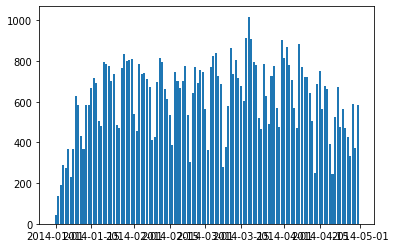

In [18]:
plt.bar(num_of_app_train.index, num_of_app_train)
plt.show()

По графику видно, что  начале года кол-во заявок росло. 
Ближе к концу рассматриваемого периода наметился тренд на снижение.

Сделующий признак, который нас интересует, - распределение дефолтов по дате подачи заявки.
Рассматриваем для строк из датасета train.

In [19]:
num_of_def_train = data['app_date'][(data['train']==1) & (data['default'] == 1)].value_counts()
num_of_def_train

2014-01-28    129
2014-03-17    129
2014-01-23    122
2014-03-18    121
2014-04-02    119
             ... 
2014-04-20     25
2014-01-03     24
2014-04-13     20
2014-01-02     18
2014-01-01      6
Name: app_date, Length: 120, dtype: int64

Посмотрим на распределение кол-ва дефолтов по дате выдачи заявки.
Рассматриваем для строк из датасета train.

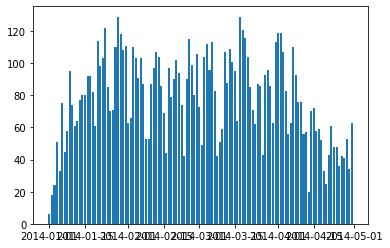

In [20]:
plt.bar(num_of_def_train.index, num_of_def_train)
plt.show()

По графику видно, что в начале кол-во дефолтов росло. 
Ближе к концу рассматриваемого периода наметился тренд на снижение.
Можно сделать вывод, что банк стал лучше работать со временем: он стал меньше выдавать потенциально проблемных кредитов и кол-во дефолтов снизилось.

Создадим новые признаки на основе переменной 'app_date'.

In [21]:
# добавим в датасет data кол-во заявок, поданных в каждую дату по данным датасета train
data['num_of_app'] = data['app_date'].replace(to_replace=num_of_app_train.to_dict())

# добавим в датасет data кол-во дефолтов, на каждую дату поданной заявки по данным датасета train
data['num_of_def'] = data['app_date'].replace(to_replace=num_of_def_train.to_dict())
data

# на основе добаленных переменных создадим новую - доля дефолтов от кол-ва поданных заявок
data['share_of_def'] = data['num_of_def']/data['num_of_app']
data

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,...,work_address,income,sna,first_time,foreign_passport,default,train,num_of_app,num_of_def,share_of_def
0,25905,2014-02-01,SCH,M,62,Y,Y,0,0,-2.008753,...,2,18000,4,1,N,0,1,542,63,0.116236
1,63161,2014-03-12,SCH,F,59,N,N,0,0,-1.532276,...,3,19000,4,1,N,0,1,737,88,0.119403
2,25887,2014-02-01,SCH,M,25,Y,N,2,0,-1.408142,...,2,30000,1,4,Y,0,1,542,63,0.116236
3,16222,2014-01-23,SCH,F,53,N,N,0,0,-2.057471,...,3,10000,1,3,N,0,1,703,122,0.173542
4,101655,2014-04-18,GRD,M,48,N,N,0,1,-1.244723,...,3,30000,1,4,Y,0,1,661,52,0.078669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,83775,2014-03-31,SCH,F,37,N,N,1,0,-1.744976,...,3,15000,4,1,N,0,0,904,113,0.125000
110144,106254,2014-04-25,GRD,F,64,Y,Y,0,0,-2.293781,...,2,200000,1,4,N,0,0,470,36,0.076596
110145,81852,2014-03-30,GRD,M,31,N,N,2,0,-0.940752,...,2,60000,4,2,N,0,0,475,63,0.132632
110146,1971,2014-01-07,UGR,F,27,N,N,1,0,-1.242392,...,3,30000,1,1,N,0,0,228,45,0.197368


Уберем из датасета data кол-во дефолтов по данным датасета train, 
т.к. в новом датасете data картина может быть другой.

In [22]:
del data['num_of_def']

Также заменим значения в переменной кол-во заявок по данным датасета train на кол-во заявок 
в новом датасете data. (Т.е. по сути, добавим эту информацию для записей из датасета test.)

In [23]:
num_of_app_data = data['app_date'].value_counts()
data['num_of_app'] = data['app_date'].replace(to_replace=num_of_app_data.to_dict())

In [24]:
# добавим новые переменные 'share_of_def', 'num_of_app' в список числовых переменных
num_cols.append('share_of_def')
num_cols.append('num_of_app')

In [25]:
# проверяем, что переменные добавлены
num_cols

['age',
 'decline_app_cnt',
 'score_bki',
 'bki_request_cnt',
 'region_rating',
 'income',
 'share_of_def',
 'num_of_app']

In [26]:
data

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,...,home_address,work_address,income,sna,first_time,foreign_passport,default,train,num_of_app,share_of_def
0,25905,2014-02-01,SCH,M,62,Y,Y,0,0,-2.008753,...,1,2,18000,4,1,N,0,1,794,0.116236
1,63161,2014-03-12,SCH,F,59,N,N,0,0,-1.532276,...,2,3,19000,4,1,N,0,1,1110,0.119403
2,25887,2014-02-01,SCH,M,25,Y,N,2,0,-1.408142,...,1,2,30000,1,4,Y,0,1,794,0.116236
3,16222,2014-01-23,SCH,F,53,N,N,0,0,-2.057471,...,2,3,10000,1,3,N,0,1,1060,0.173542
4,101655,2014-04-18,GRD,M,48,N,N,0,1,-1.244723,...,2,3,30000,1,4,Y,0,1,981,0.078669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,83775,2014-03-31,SCH,F,37,N,N,1,0,-1.744976,...,2,3,15000,4,1,N,0,0,1317,0.125000
110144,106254,2014-04-25,GRD,F,64,Y,Y,0,0,-2.293781,...,1,2,200000,1,4,N,0,0,698,0.076596
110145,81852,2014-03-30,GRD,M,31,N,N,2,0,-0.940752,...,1,2,60000,4,2,N,0,0,722,0.132632
110146,1971,2014-01-07,UGR,F,27,N,N,1,0,-1.242392,...,2,3,30000,1,1,N,0,0,349,0.197368


4.3 Категориальные переменные

Бинарная переменная "education":
SCH    39167
GRD    23365
UGR     9816
PGR     1257
ACD      194
Name: education, dtype: int64


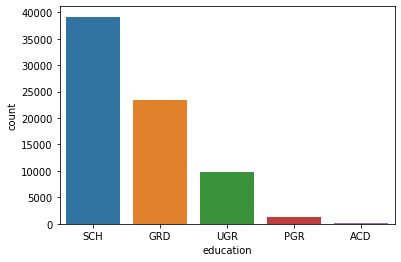

Бинарная переменная "home_address":
2    39956
1    32585
3     1258
Name: home_address, dtype: int64


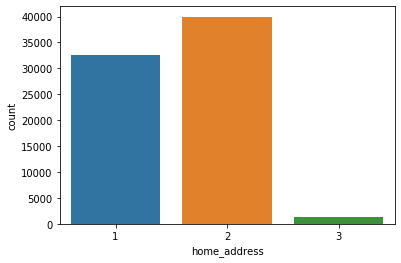

Бинарная переменная "work_address":
3    44959
2    20506
1     8334
Name: work_address, dtype: int64


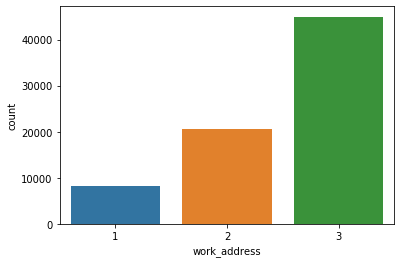

Бинарная переменная "sna":
1    47301
4    11749
2    10626
3     4123
Name: sna, dtype: int64


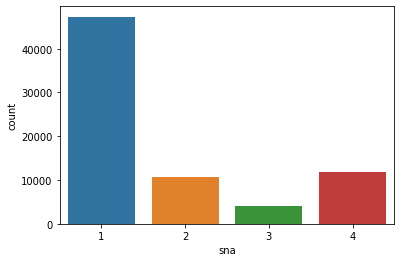

Бинарная переменная "first_time":
3    31255
4    18737
1    12239
2    11568
Name: first_time, dtype: int64


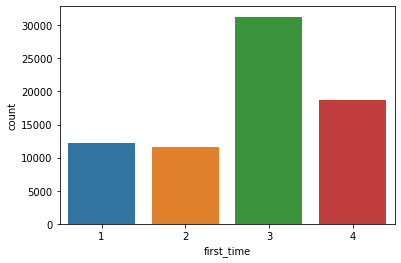

In [27]:
# работаем по циклу с переменными 
# рассматриваем для строк из датасета train
for col in cat_cols:
    print('Бинарная переменная "{a}":'.format(a=col)) # выводим название переменной
    print(data[col][data['train']==1].value_counts()) # выводим уникальные значения и их количество
    # выводим распределение заемщиков по признакам
    plt.figure()
    sns.countplot(x=col, data=data[data['train']==1])
    plt.show()

Выводы:
в переменной "education" приходится малая доля на значения PGR и ACD,
в переменной "home_address" приходится малая доля на значение 3.
Для остальных переменных доля всех значений достаточно велика, но имется один ярко выраженный признак.

4.4 Бинарные переменные

Бинарная переменная "sex":
F    41562
M    32237
Name: sex, dtype: int64


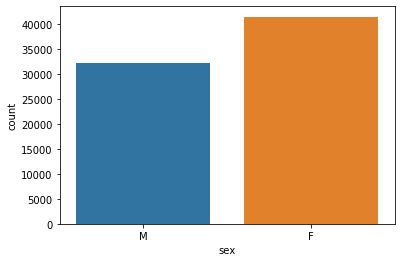

Бинарная переменная "car":
N    49832
Y    23967
Name: car, dtype: int64


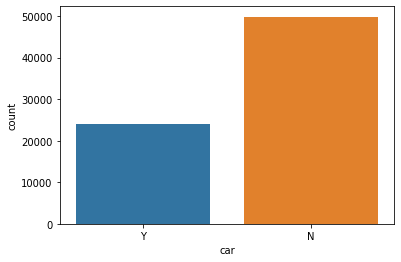

Бинарная переменная "car_type":
N    59791
Y    14008
Name: car_type, dtype: int64


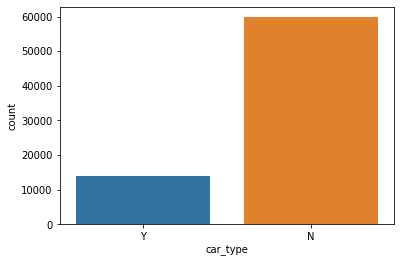

Бинарная переменная "good_work":
0    61630
1    12169
Name: good_work, dtype: int64


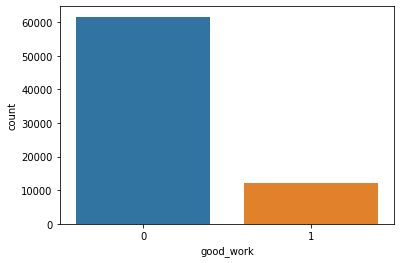

Бинарная переменная "foreign_passport":
N    62733
Y    11066
Name: foreign_passport, dtype: int64


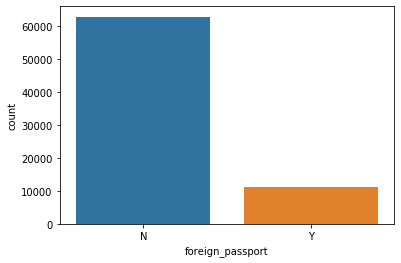

In [28]:
# работаем по циклу с переменными 
# рассматриваем для строк из датасета train
for col in bin_cols:
    print('Бинарная переменная "{a}":'.format(a=col)) # выводим название переменной
    print(data[col][data['train']==1].value_counts()) # выводим уникальные значения и их количество
    # выводим распределение заемщиков по признакам
    plt.figure()
    sns.countplot(x=col, data=data[data['train']==1])
    plt.show()

Выводы:
в переменной "sex" значения распределены примерно поровну,
в остальных переменные распределение неравномерно - имеется серьезное преобладание одного из признаков.

4.4 Числовые переменные

Числовая переменная "age":
count    73799.000000
mean        39.280641
std         11.520378
min         21.000000
25%         30.000000
50%         37.000000
75%         48.000000
max         72.000000
Name: age, dtype: float64


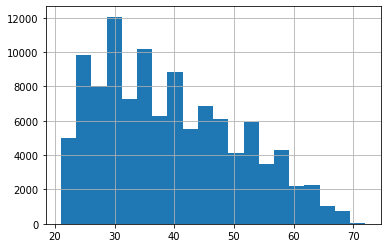

Числовая переменная "decline_app_cnt":
count    73799.000000
mean         0.275749
std          0.804272
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         33.000000
Name: decline_app_cnt, dtype: float64


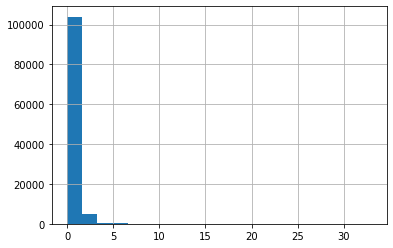

Числовая переменная "score_bki":
count    73799.000000
mean        -1.904724
std          0.498231
min         -3.624586
25%         -2.259534
50%         -1.920823
75%         -1.569831
max          0.199773
Name: score_bki, dtype: float64


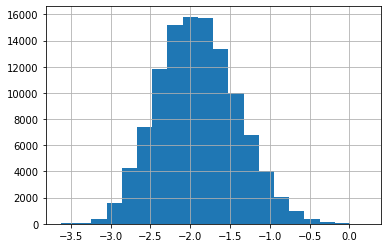

Числовая переменная "bki_request_cnt":
count    73799.000000
mean         2.000339
std          2.252073
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         53.000000
Name: bki_request_cnt, dtype: float64


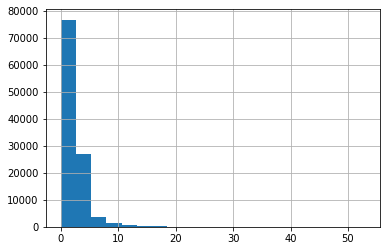

Числовая переменная "region_rating":
count    73799.000000
mean        56.725701
std         13.055717
min         20.000000
25%         50.000000
50%         50.000000
75%         60.000000
max         80.000000
Name: region_rating, dtype: float64


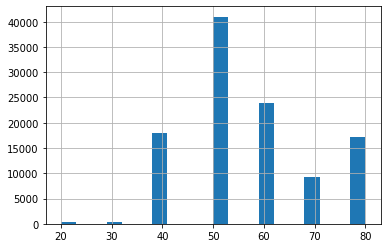

Числовая переменная "income":
count      73799.000000
mean       41099.775417
std        46166.322400
min         1000.000000
25%        20000.000000
50%        30000.000000
75%        48000.000000
max      1000000.000000
Name: income, dtype: float64


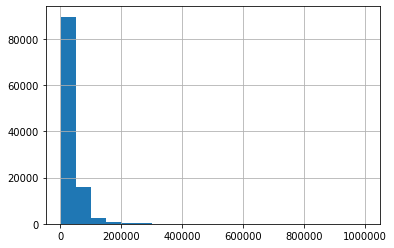

Числовая переменная "share_of_def":
count    73799.000000
mean         0.126994
std          0.020828
min          0.076596
25%          0.115489
50%          0.129464
75%          0.140306
max          0.203252
Name: share_of_def, dtype: float64


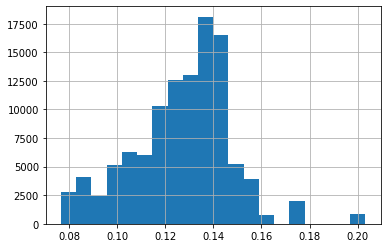

Числовая переменная "num_of_app":
count    73799.000000
mean      1003.073212
std        235.056937
min         56.000000
25%        848.000000
50%       1071.000000
75%       1173.000000
max       1491.000000
Name: num_of_app, dtype: float64


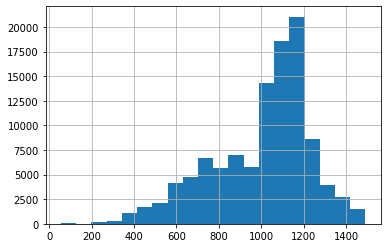

In [29]:
# работаем по циклу с переменными 
# рассматриваем для строк из датасета train
for col in num_cols:
    print('Числовая переменная "{a}":'.format(a=col)) # выводим название переменной
    print(data[col][data['train']==1].describe())
    # выводим распределение заемщиков по признакам
    data[col].hist(bins=20)
    plt.show()

Числовая переменная "age":
count    73799.000000
mean        39.280641
std         11.520378
min         21.000000
25%         30.000000
50%         37.000000
75%         48.000000
max         72.000000
Name: age, dtype: float64


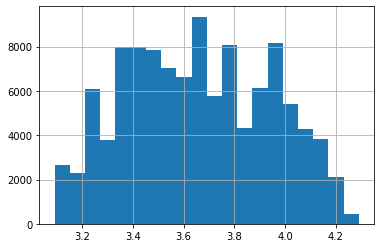

Числовая переменная "decline_app_cnt":
count    73799.000000
mean         0.275749
std          0.804272
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         33.000000
Name: decline_app_cnt, dtype: float64


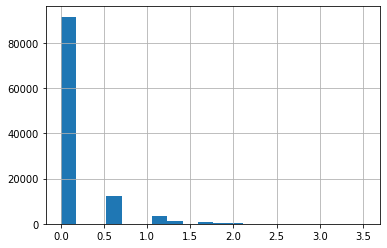

Числовая переменная "score_bki":
count    73799.000000
mean        -1.904724
std          0.498231
min         -3.624586
25%         -2.259534
50%         -1.920823
75%         -1.569831
max          0.199773
Name: score_bki, dtype: float64


C:\Users\Evgeny\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


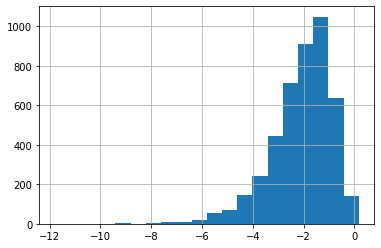

Числовая переменная "bki_request_cnt":
count    73799.000000
mean         2.000339
std          2.252073
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         53.000000
Name: bki_request_cnt, dtype: float64


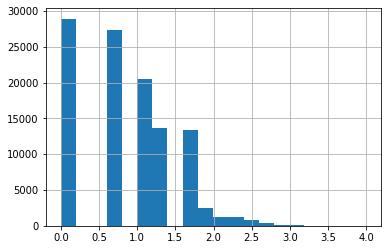

Числовая переменная "region_rating":
count    73799.000000
mean        56.725701
std         13.055717
min         20.000000
25%         50.000000
50%         50.000000
75%         60.000000
max         80.000000
Name: region_rating, dtype: float64


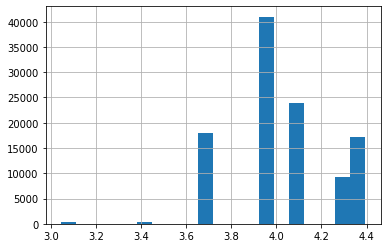

Числовая переменная "income":
count      73799.000000
mean       41099.775417
std        46166.322400
min         1000.000000
25%        20000.000000
50%        30000.000000
75%        48000.000000
max      1000000.000000
Name: income, dtype: float64


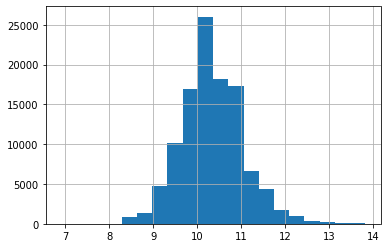

Числовая переменная "share_of_def":
count    73799.000000
mean         0.126994
std          0.020828
min          0.076596
25%          0.115489
50%          0.129464
75%          0.140306
max          0.203252
Name: share_of_def, dtype: float64


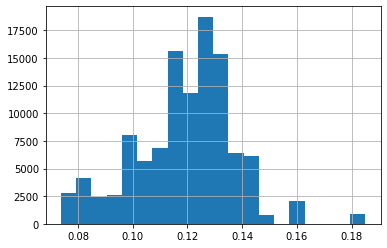

Числовая переменная "num_of_app":
count    73799.000000
mean      1003.073212
std        235.056937
min         56.000000
25%        848.000000
50%       1071.000000
75%       1173.000000
max       1491.000000
Name: num_of_app, dtype: float64


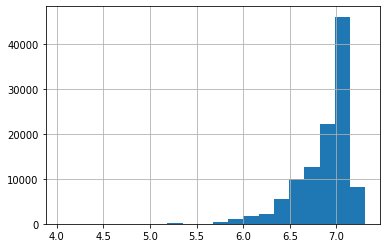

In [30]:
# посмотрим на распределение логарифмов переменных
# рассматриваем для строк из датасета train
for col in num_cols:
    print('Числовая переменная "{a}":'.format(a=col)) # выводим название переменной
    print(data[col][data['train']==1].describe())
    # выводим распределение заемщиков по признакам
    np.log(data[col]+1).hist(bins=20)
    plt.show()

Числовая переменная "age":
count    73799.000000
mean        39.280641
std         11.520378
min         21.000000
25%         30.000000
50%         37.000000
75%         48.000000
max         72.000000
Name: age, dtype: float64


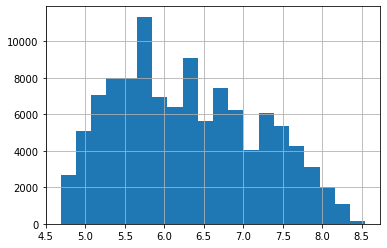

Числовая переменная "decline_app_cnt":
count    73799.000000
mean         0.275749
std          0.804272
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         33.000000
Name: decline_app_cnt, dtype: float64


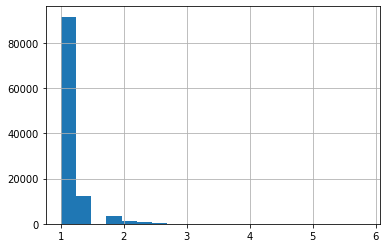

Числовая переменная "score_bki":
count    73799.000000
mean        -1.904724
std          0.498231
min         -3.624586
25%         -2.259534
50%         -1.920823
75%         -1.569831
max          0.199773
Name: score_bki, dtype: float64


C:\Users\Evgeny\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


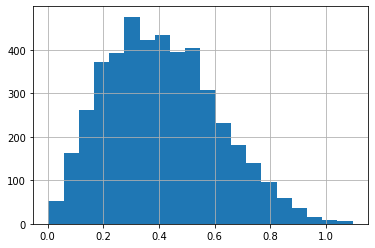

Числовая переменная "bki_request_cnt":
count    73799.000000
mean         2.000339
std          2.252073
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         53.000000
Name: bki_request_cnt, dtype: float64


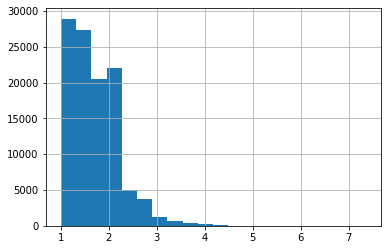

Числовая переменная "region_rating":
count    73799.000000
mean        56.725701
std         13.055717
min         20.000000
25%         50.000000
50%         50.000000
75%         60.000000
max         80.000000
Name: region_rating, dtype: float64


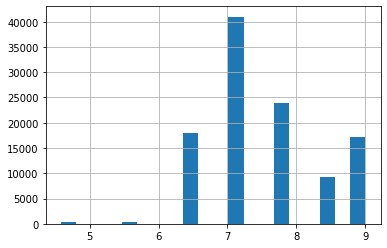

Числовая переменная "income":
count      73799.000000
mean       41099.775417
std        46166.322400
min         1000.000000
25%        20000.000000
50%        30000.000000
75%        48000.000000
max      1000000.000000
Name: income, dtype: float64


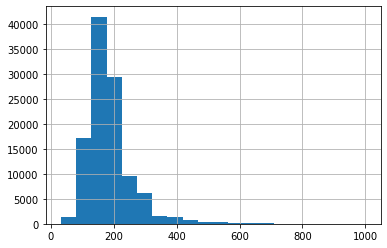

Числовая переменная "share_of_def":
count    73799.000000
mean         0.126994
std          0.020828
min          0.076596
25%          0.115489
50%          0.129464
75%          0.140306
max          0.203252
Name: share_of_def, dtype: float64


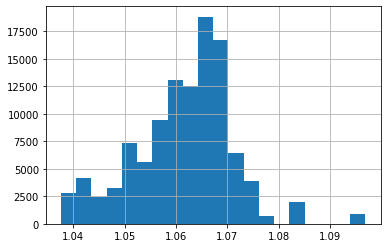

Числовая переменная "num_of_app":
count    73799.000000
mean      1003.073212
std        235.056937
min         56.000000
25%        848.000000
50%       1071.000000
75%       1173.000000
max       1491.000000
Name: num_of_app, dtype: float64


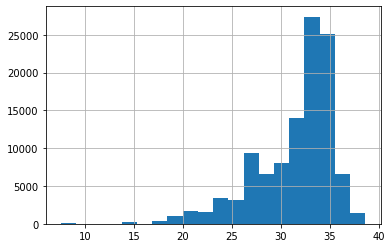

In [31]:
# посмотрим на распределение квадратных корней из переменных
# рассматриваем для строк из датасета train
for col in num_cols:
    print('Числовая переменная "{a}":'.format(a=col)) # выводим название переменной
    print(data[col][data['train']==1].describe())
    # выводим распределение заемщиков по признакам
    np.sqrt(data[col]+1).hist(bins=20)
    plt.show()

Видим, что для переменных "age", "bki_request_cnt", "income" распределение логарифов более нормальное.
Поэтому заменим значения тих переменных в датасете data на логарифмы.
Переменные "decline_app_cnt" "score_bki"б "region_rating" оставим без изменений - 
логарифмирование и извлечение квадратного корня не делают распределение более нормальным.

In [32]:
# замену производим для всего датасета data
data['age'] = np.log(data['age']+1)
data['bki_request_cnt'] = np.log(data['bki_request_cnt']+1)
data['income'] = np.log(data['income']+1)

Числовая переменная "age":
count    110148.000000
mean          3.654546
std           0.285054
min           3.091042
25%           3.433987
50%           3.637586
75%           3.891820
max           4.290459
Name: age, dtype: float64


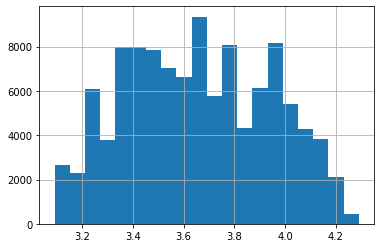

Числовая переменная "decline_app_cnt":
count    110148.000000
mean          0.273205
std           0.799099
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          33.000000
Name: decline_app_cnt, dtype: float64


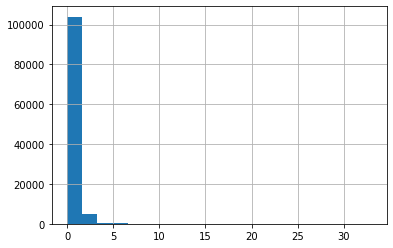

Числовая переменная "score_bki":
count    110148.000000
mean         -1.904535
std           0.499397
min          -3.624586
25%          -2.260434
50%          -1.920823
75%          -1.567888
max           0.199773
Name: score_bki, dtype: float64


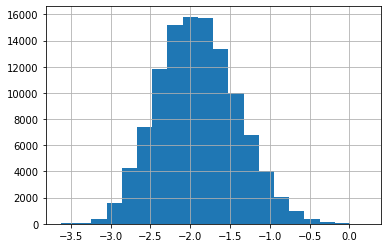

Числовая переменная "bki_request_cnt":
count    110148.000000
mean          0.878752
std           0.658667
min           0.000000
25%           0.000000
50%           0.693147
75%           1.386294
max           3.988984
Name: bki_request_cnt, dtype: float64


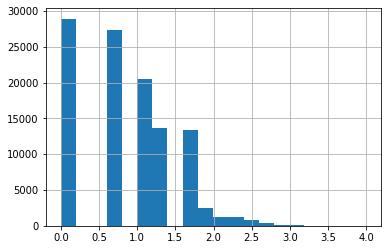

Числовая переменная "region_rating":
count    110148.000000
mean         56.751189
std          13.065923
min          20.000000
25%          50.000000
50%          50.000000
75%          60.000000
max          80.000000
Name: region_rating, dtype: float64


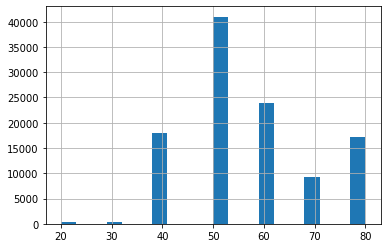

Числовая переменная "income":
count    110148.000000
mean         10.345792
std           0.696636
min           6.908755
25%           9.903538
50%          10.308986
75%          10.778977
max          13.815512
Name: income, dtype: float64


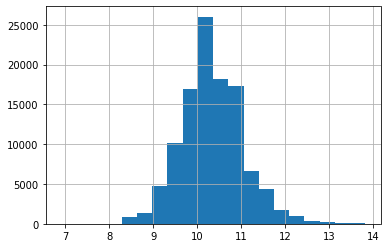

Числовая переменная "share_of_def":
count    110148.000000
mean          0.127022
std           0.020775
min           0.076596
25%           0.115489
50%           0.129464
75%           0.140306
max           0.203252
Name: share_of_def, dtype: float64


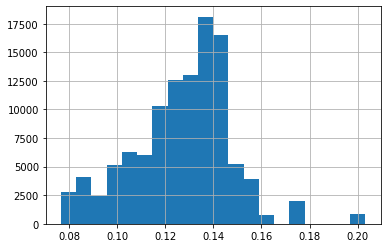

Числовая переменная "num_of_app":
count    110148.000000
mean       1002.761267
std         234.959584
min          56.000000
25%         848.000000
50%        1071.000000
75%        1173.000000
max        1491.000000
Name: num_of_app, dtype: float64


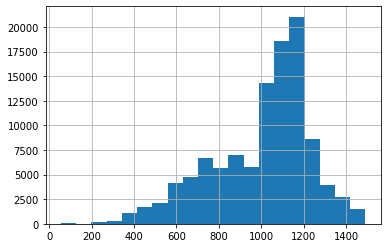

In [33]:
# посмотрим на распределения получишихся переменных
# смотрим для всего датасета data
for col in num_cols:
    print('Числовая переменная "{a}":'.format(a=col)) # выводим название переменной
    print(data[col].describe())
    # выводим распределение заемщиков по признакам
    data[col].hist(bins=20)
    plt.show()

In [34]:
# посчитаем выбросы для каждой переменной
# считаем для всего датасета data
for col in num_cols:
    print('Числовая переменная "{a}":'.format(a=col)) # выводим название переменной
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    left = Q1-1.5*IQR
    right = Q3+1.5*IQR
    print('Количество выбросов: ',data[col][(data[col] < left) | (data[col] > right)].count())
    print('\n')

Числовая переменная "age":
Количество выбросов:  0


Числовая переменная "decline_app_cnt":
Количество выбросов:  18677


Числовая переменная "score_bki":
Количество выбросов:  518


Числовая переменная "bki_request_cnt":
Количество выбросов:  15


Числовая переменная "region_rating":
Количество выбросов:  17917


Числовая переменная "income":
Количество выбросов:  2609


Числовая переменная "share_of_def":
Количество выбросов:  1564


Числовая переменная "num_of_app":
Количество выбросов:  1281




Выводы по рассмотрению гистограмм и определению  выбросов:
на самом деле, выбросы, которые мы определили, таковыми могут не являться - 
по физическому смыслу переменные могут принимать такие значения.
На данном этапе удалять выбросы из датасета не будем.

5.1 Преобразования бинарных переменных

In [35]:
# посмотрим детальнее, какие данные хранятся в бинарных переменных
data[bin_cols]

,sex,car,car_type,good_work,foreign_passport
0,M,Y,Y,0,N
1,F,N,N,0,N
2,M,Y,N,0,Y
3,F,N,N,0,N
4,M,N,N,1,Y
...,...,...,...,...,...
110143,F,N,N,0,N
110144,F,Y,Y,0,N
110145,M,N,N,0,N
110146,F,N,N,0,N


In [36]:
# преобразуем даные с помощью метода fit класса LabelEncoder
# работаем со всем датасетом data
label_encoder = LabelEncoder()
for col in bin_cols:
    data[col] = pd.Series(label_encoder.fit_transform(data[col]))

In [37]:
# проверим преобразования
data[bin_cols].head()

,sex,car,car_type,good_work,foreign_passport
0,1,1,1,0,0
1,0,0,0,0,0
2,1,1,0,0,1
3,0,0,0,0,0
4,1,0,0,1,1


5.2 Преобразования категориальных переменных

In [38]:
# посмотрим детальнее, какие данные хранятся в категориальных переменных
data[cat_cols]

,education,home_address,work_address,sna,first_time
0,SCH,1,2,4,1
1,SCH,2,3,4,1
2,SCH,1,2,1,4
3,SCH,2,3,1,3
4,GRD,2,3,1,4
...,...,...,...,...,...
110143,SCH,2,3,4,1
110144,GRD,1,2,1,4
110145,GRD,1,2,4,2
110146,UGR,2,3,1,1


In [39]:
# преобразуем переменную "education"
# работаем со всем датасетом data
label_encoder = LabelEncoder()
data['education'] = pd.Series(label_encoder.fit_transform(data['education']))

In [40]:
# проверим преобразования
data[cat_cols]

,education,home_address,work_address,sna,first_time
0,3,1,2,4,1
1,3,2,3,4,1
2,3,1,2,1,4
3,3,2,3,1,3
4,1,2,3,1,4
...,...,...,...,...,...
110143,3,2,3,4,1
110144,1,1,2,1,4
110145,1,1,2,4,2
110146,4,2,3,1,1


5.3 Оценка корреляций

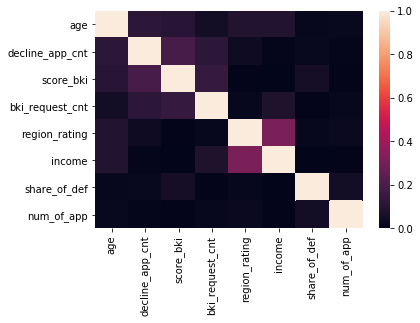

In [41]:
# оценим корреляцию Пирсона для числовых переменных
sns.heatmap(data[num_cols].corr().abs(), vmin=0, vmax=1)

Выводы:
1.Признаки слабо коррелированы между собой
2.Все признаки будем использовать в модели.

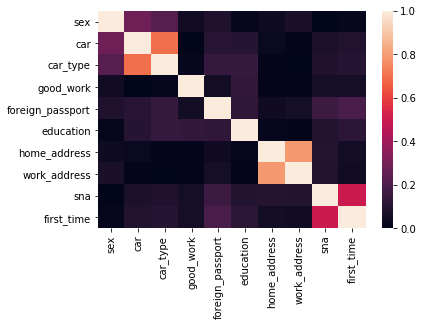

In [42]:
# оценим корреляцию Спирмана для нечисловых переменных
sns.heatmap(data[bin_cols + cat_cols].corr(method='spearman').abs(), vmin=0, vmax=1)

Выводы:
1.Высокая коррекляция перемнных car и car_type. 
  В модели будем использовать перемнную car.
2.Высокая корреляция переменных home_address и work_address. 
  В модели будем использовать перемнную home_address.

In [43]:
# оставим бинарные и категориальные переменные, которые будут использоваться в модели
bin_cols = ['sex', 'car_type', 'good_work', 'foreign_passport']
cat_cols = ['education', 'home_address', 'sna', 'first_time']

5.3 Оценка значимости числовых переменных

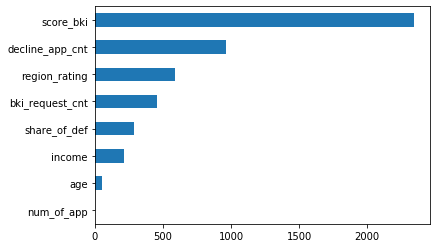

In [44]:
# проверяем значимость переменных
# работаем с записями из датасета train
imp_num = pd.Series(f_classif(data[data['train'] == 1][num_cols],
                              data[data['train'] == 1]['default'])[0], index=num_cols)
imp_num.sort_values(inplace=True)
imp_num.plot(kind='barh')

Как и ожидалось, самая важная переменная - 'score_bki'.
В тоже время 'num_of_app' не важна. Не будем использовать ее в модели.

5.4 Оценка значимости категориальных и бинарных переменных

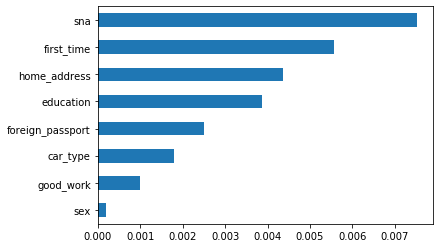

In [45]:
# проверяем значимость переменных
# работаем с записями из датасета train
imp_cat = Series(mutual_info_classif(data[data['train'] == 1][bin_cols + cat_cols], data[data['train'] == 1]['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Самая важная переменная - 'sna'. 
Наименее важная переменная - 'sex' не важна. 
Все переменные будем использовать в модели.

6. Строим модель

In [46]:
# выделяем тренировочный датасет из датасета data
data_train = data[data['train'] == 1]
data_train = data_train.drop(['client_id', 'app_date', 'train'], axis=1)

In [47]:
# проверяем тренировочный датасет
display(data_train.head(5))

,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,num_of_app,share_of_def
0,3,1,4.143135,1,1,0,0,-2.008753,0.693147,50,1,2,9.798183,4,1,0,0,794,0.116236
1,3,0,4.094345,0,0,0,0,-1.532276,1.386294,50,2,3,9.852247,4,1,0,0,1110,0.119403
2,3,1,3.258097,1,0,2,0,-1.408142,0.693147,80,1,2,10.308986,1,4,1,0,794,0.116236
3,3,0,3.988984,0,0,0,0,-2.057471,1.098612,50,2,3,9.210440,1,3,0,0,1060,0.173542
4,1,1,3.891820,0,0,0,1,-1.244723,0.693147,60,2,3,10.308986,1,4,1,0,981,0.078669


In [48]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   education         73799 non-null  int32  
 1   sex               73799 non-null  int32  
 2   age               73799 non-null  float64
 3   car               73799 non-null  int32  
 4   car_type          73799 non-null  int32  
 5   decline_app_cnt   73799 non-null  int64  
 6   good_work         73799 non-null  int64  
 7   score_bki         73799 non-null  float64
 8   bki_request_cnt   73799 non-null  float64
 9   region_rating     73799 non-null  int64  
 10  home_address      73799 non-null  int64  
 11  work_address      73799 non-null  int64  
 12  income            73799 non-null  float64
 13  sna               73799 non-null  int64  
 14  first_time        73799 non-null  int64  
 15  foreign_passport  73799 non-null  int32  
 16  default           73799 non-null  int64 

In [49]:
# преобразуем категориальные переменные методом One-Hot Encoding
data_train_cat = OneHotEncoder(sparse = False).fit_transform(data_train[cat_cols].values)

In [50]:
# проверяем
data_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [51]:
# стандартизируем числовые переменные
data_train_num = StandardScaler().fit_transform(data_train[num_cols].values)

In [52]:
# проверяем
data_train_num

array([[ 1.71113664, -0.34285766, -0.2087987 , ..., -0.78501579,
        -0.51650253, -0.88946377],
       [ 1.5399884 , -0.34285766,  0.74754461, ..., -0.70752611,
        -0.36445207,  0.45490047],
       [-1.39343857,  2.14387966,  0.99669566, ..., -0.05288771,
        -0.51650253, -0.88946377],
       ...,
       [-0.66507223, -0.34285766,  0.78696739, ...,  0.5282444 ,
        -1.73254563, -0.03860032],
       [-0.89146325, -0.34285766,  0.85380611, ..., -1.25140899,
         2.34635007, -2.36571184],
       [-0.35072683, -0.34285766,  0.28102087, ..., -0.31419734,
         2.2349535 ,  0.24218461]])

In [53]:
# объединяем категориальные, бинарные, числовые признаки в одно признаковое пространство
X = np.hstack([data_train_num, data_train[bin_cols].values, data_train_cat])
y = data_train['default'].values

In [54]:
# Разобьем данные для обучения и тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [55]:
# строим модель
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Evgeny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

7. Оценка качества модели

7.1 ROC-анализ

In [56]:
# считаем метрики обучающей (X_train, y_train) выборки
y_train_probs = model.predict_proba(X_train)
y_train_probs = y_train_probs[:,1]
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_train_probs)
roc_auc_train = roc_auc_score(y_train, y_train_probs)

In [57]:
# считаем метрики тестовой (X_test, y_test) выборки
y_test_probs = model.predict_proba(X_test)
y_test_probs = y_test_probs[:,1]
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_test_probs)
roc_auc_test = roc_auc_score(y_test, y_test_probs)

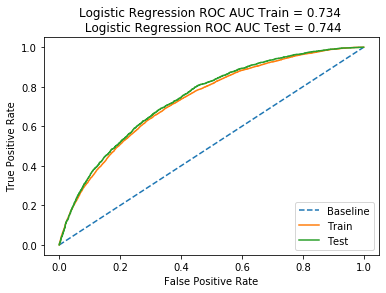

In [58]:
# строим графики метрик
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr_train, tpr_train, label = 'Train')
plt.plot(fpr_test, tpr_test, label = 'Test')
plt.title('Logistic Regression ROC AUC Train = {a} \n Logistic Regression ROC AUC Test = {b}'
          .format(a = roc_auc_train.round(3), b = roc_auc_test.round(3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

 Вывод: метрика ROC AUC для обучающей и тестовоый выборок близка. 
 Посмотрим, можно ли найти более оптимальные параметры для модели.

8. Поиск оптимальных значений гиперпараметров

In [59]:
# импорт библиотеки
from sklearn.model_selection import GridSearchCV

In [60]:
# ищем оптимальные значения гиперпараметров
model = LogisticRegression()
param_grid = [
    {'penalty': ['l1'], 
     'solver': ['liblinear', 'lbfgs'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr']}, 
    {'penalty': ['l2'], 
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr']}, 
    {'penalty': ['none'], 
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr']} 
]
gridsearch = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_
## печатаем параметры
best_parameters = model.get_params()
for param_name in best_parameters:
        print(param_name, best_parameters[param_name], '\n')

C 1.0 

class_weight balanced 

dual False 

fit_intercept True 

intercept_scaling 1 

l1_ratio None 

max_iter 100 

multi_class auto 

n_jobs None 

penalty l1 

random_state None 

solver liblinear 

tol 0.0001 

verbose 0 

warm_start False 



9. Строим модель с подобранными гиперпарметрами

In [61]:
# Разобьем данные для обучения и тестирования по новой
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [62]:
# строим модель
new_model = LogisticRegression(random_state = None, 
                               C = 1, 
                               class_weight = 'balanced', 
                               dual = False, 
                               fit_intercept = True, 
                               intercept_scaling = 1, 
                               l1_ratio = None, 
                               max_iter = 100, 
                               multi_class = 'auto', 
                               n_jobs = None, 
                               penalty = 'l1', 
                               solver = 'liblinear', 
                               tol = 0.0001,
                               verbose = 0, 
                               warm_start = False)
new_model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
# считаем метрики обучающещей (X_train, y_train) выборки
y_train_probs = new_model.predict_proba(X_train)
y_train_probs = y_train_probs[:,1]
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_train_probs)
roc_auc_train = roc_auc_score(y_train, y_train_probs)

In [64]:
# считаем метрики тестовой (X_test, y_test) выборки
y_test_probs = new_model.predict_proba(X_test)
y_test_probs = y_test_probs[:,1]
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_test_probs)
roc_auc_test = roc_auc_score(y_test, y_test_probs)

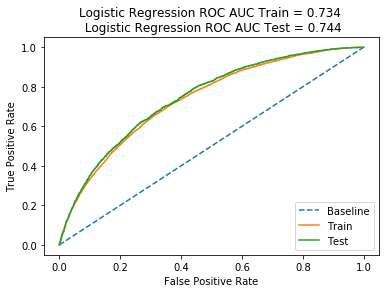

In [65]:
# строи графики метрик
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr_train, tpr_train, label = 'Train')
plt.plot(fpr_test, tpr_test, label = 'Test')
plt.title('Logistic Regression ROC AUC Train = {a} \n Logistic Regression ROC AUC Test = {b}'
          .format(a = roc_auc_train.round(3), b = roc_auc_test.round(3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

Вывод: расхождение метрика ROC AUC для обучающей и тестовоый выборок не изменилось. 
Будем использовать модель с подобранными гиперпараметрами.

9. Определяем значение дефолта клиентов

In [66]:
# выделяем тестовый датасет из датасета data
data_test = data[data['train'] == 0]
data_test = data_test.drop(['client_id', 'app_date', 'train'], axis=1)

In [67]:
# преобразуем категориальные переменные методом One-Hot Encoding
data_test_cat = OneHotEncoder(sparse = False).fit_transform(data_test[cat_cols].values)

In [68]:
# проверяем
data_test_cat

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [69]:
# стандартизируем числовые переменные
data_test_num = StandardScaler().fit_transform(data_test[num_cols].values)

In [70]:
# проверяем
data_test_num

array([[-0.88333898, -0.33995109, -0.73288746, ...,  0.68282058,
         0.4450004 , -0.99730532],
       [ 0.12606863,  6.00146439,  0.79551047, ..., -2.63253397,
        -0.56077739,  0.35300684],
       [ 0.97850869, -0.33995109,  0.42413578, ..., -0.05272498,
         0.31650603, -1.33807811],
       ...,
       [-0.65688874,  2.1966151 ,  1.92005304, ...,  0.9453502 ,
         0.26864856, -1.19324967],
       [-1.12541848,  0.92833201,  1.31888606, ..., -0.05272498,
         3.40089756, -2.78210279],
       [ 0.0372345 , -0.33995109,  0.79042787, ..., -1.05077617,
         0.70270711,  1.4818167 ]])

In [71]:
# объединяем категориальные, бинарные, числовые признаки в одно признаковое пространство
X = np.hstack([data_test_num, data_test[bin_cols].values, data_test_cat])

In [72]:
# делаем расчет
y = new_model.predict_proba(X)
y = y[:,1]

In [73]:
# создаем новый датасет
submit = pd.DataFrame(test.client_id)

In [74]:
# включаем в датасет парсчитанные значения переменной default
submit['default'] = y

In [75]:
# выгружаем получившийся датасет в файл
submit.to_csv('submission.csv', index=False)